Copyright (c) 2023 Habana Labs, Ltd. an Intel Company.  
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


# Stable Diffusion PyTorch Inference on Gaudi

In this notebook we will demonstrate how you can run inference on a Habana Gaudi with the stable-diffusion text-to-image generation model using Pytorch.

## Run inference

Since we already have cloned Habana `Model-References` repository branch to this docker, let us cd to the appropriate directory where our text-to-image generation script and model resides.

In [1]:
%cd /root/Model-References/PyTorch/generative_models/stable-diffusion-v-1-5

/root/Model-References/PyTorch/generative_models/stable-diffusion-v-1-5


Set the PYTHONPATH environment variable and point it to the stable diffusion directory.

In [23]:
%set_env PYTHONPATH=/root/Model-References/PyTorch/generative_models/stable-diffusion-v-1-5/:/root/Model-References/PyTorch/generative_models/stable-diffusion-v-1-5/src:/root/examples/models:/usr/lib/habanalabs/:/root

env: PYTHONPATH=/root/Model-References/PyTorch/generative_models/stable-diffusion-v-1-5/:/root/Model-References/PyTorch/generative_models/stable-diffusion-v-1-5/src:/root/examples/models:/usr/lib/habanalabs/:/root


Next, we need to install all the Python package dependencies.

In [17]:
!git config --global --add safe.directory `pwd`/src/clip && pip install -q -r requirements.txt
!pip install -q taming-transformers-rom1504


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


Now we download the model checkpoint from huggingface.

In [7]:
%mkdir -p models/ldm/stable-diffusion-v1/
!wget --user $YOUR_USERNAME --password $YOUR_PASSWORD -O models/ldm/stable-diffusion-v1/v1-5-pruned-emaonly.ckpt https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt

--2023-03-14 00:31:10--  https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 54.211.191.26, 52.87.110.41, 52.20.117.96, ...
Connecting to huggingface.co (huggingface.co)|54.211.191.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/6b/20/6b201da5f0f5c60524535ebb7deac2eef68605655d3bbacfee9cce0087f3b3f5/cc6cb27103417325ff94f52b7a5d2dde45a7515b25c255d8e396c90014281516?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27v1-5-pruned-emaonly.ckpt%3B+filename%3D%22v1-5-pruned-emaonly.ckpt%22%3B&Expires=1679008285&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzZiLzIwLzZiMjAxZGE1ZjBmNWM2MDUyNDUzNWViYjdkZWFjMmVlZjY4NjA1NjU1ZDNiYmFjZmVlOWNjZTAwODdmM2IzZjUvY2M2Y2IyNzEwMzQxNzMyNWZmOTRmNTJiN2E1ZDJkZGU0NWE3NTE1YjI1YzI1NWQ4ZTM5NmM5MDAxNDI4MTUxNj9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoiLCJDb2

In [26]:
!ls models/ldm/stable-diffusion-v1/

v1-5-pruned-emaonly.ckpt


Now we are ready for image generation. Enter a prompt by running the cell below.

In [11]:
prompt = input("Enter a prompt for image generation: ")

Enter a prompt for image generation:  horses running into the sunset


Run the following cell to generate images from your text prompt.

In [24]:
cmd = f'python scripts/txt2img.py --prompt "{prompt}" --ddim_eta 0.0 --n_samples 4 --n_rows 4 --n_iter 1 --scale 5.0  --ddim_steps 50 --device "hpu" --precision hmp --use_hpu_graph'
print(cmd)
import os
os.system(cmd)

python scripts/txt2img.py --prompt "horses running into the sunset" --ddim_eta 0.0 --n_samples 4 --n_rows 4 --n_iter 1 --scale 5.0  --ddim_steps 50 --device "hpu" --precision hmp --use_hpu_graph


Global seed set to 42
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v1.10.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(
Downloading: "https://github.com/DagnyT/hardnet/raw/master/pretrained/train_liberty_with_aug/checkpoint_liberty_with_aug.pth" to /root/.cache/torch/hub/checkpoints/checkpoint_liberty_with_aug.pth
100%|██████████| 5.10M/5.10M [00:00<00:00, 318MB/s]

Loading model from models/ldm/stable-diffusion-v1/v1-5-pruned-emaonly.ckpt
Global Step: 840000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels



Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.11.mlp.fc1.bias', 'vision_model.encoder.layers.1.self_attn.q_proj.bias', 'vision_model.encoder.layers.2.layer_norm2.bias', 'vision_model.encoder.layers.16.self_attn.k_proj.bias', 'vision_model.encoder.layers.3.self_attn.q_proj.weight', 'vision_model.encoder.layers.15.layer_norm2.weight', 'vision_model.encoder.layers.6.self_attn.v_proj.weight', 'vision_model.encoder.layers.3.layer_norm2.weight', 'vision_model.encoder.layers.2.self_attn.k_proj.bias', 'vision_model.encoder.layers.19.mlp.fc1.bias', 'vision_model.encoder.layers.14.self_attn.v_proj.weight', 'vision_model.encoder.layers.5.layer_norm1.bias', 'vision_model.encoder.layers.23.self_attn.out_proj.bias', 'vision_model.encoder.layers.16.self_attn.v_proj.weight', 'vision_model.encoder.layers.10.mlp.fc1.weight', 'vision_model.encoder.layers.13.mlp.fc1.bias', 'vision_model.encoder.layers.8.m

hmp:verbose_mode  False
hmp:opt_level O1


data:   0%|          | 0/1 [00:00<?, ?it/s]/root/Model-References/PyTorch/generative_models/stable-diffusion-v-1-5/ldm/models/diffusion/ddim.py:174: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, device=device).clone().detach()


DDIM Sampler:   0%|          | 0/50 [00:00<?, ?it/s]

Creating invisible watermark encoder (see https://github.com/ShieldMnt/invisible-watermark)...
Data shape for DDIM sampling is (4, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps




DDIM Sampler:   2%|▏         | 1/50 [00:41<33:56, 41.57s/it]

DDIM Sampler:   4%|▍         | 2/50 [00:56<20:53, 26.11s/it]

DDIM Sampler:   6%|▌         | 3/50 [00:57<11:17, 14.41s/it]

DDIM Sampler:   8%|▊         | 4/50 [00:57<06:46,  8.83s/it]

DDIM Sampler:  10%|█         | 5/50 [00:57<04:18,  5.75s/it]

DDIM Sampler:  12%|█▏        | 6/50 [00:58<02:50,  3.89s/it]

DDIM Sampler:  14%|█▍        | 7/50 [00:58<01:56,  2.71s/it]

DDIM Sampler:  16%|█▌        | 8/50 [00:58<01:21,  1.93s/it]

DDIM Sampler:  18%|█▊        | 9/50 [00:58<00:57,  1.41s/it]

DDIM Sampler:  20%|██        | 10/50 [00:59<00:42,  1.06s/it]

DDIM Sampler:  22%|██▏       | 11/50 [00:59<00:32,  1.22it/s]

DDIM Sampler:  24%|██▍       | 12/50 [00:59<00:24,  1.53it/s]

DDIM Sampler:  26%|██▌       | 13/50 [01:00<00:19,  1.85it/s]

DDIM Sampler:  28%|██▊       | 14/50 [01:00<00:16,  2.18it/s]

DDIM Sampler:  30%|███       | 15/50 [01:00<00:14,  2.48it/s]

DDIM Sampler:  32%|███▏      | 16/50 [01:00<00:12,  2.74it/s]


Your samples are ready and waiting for you here: 
outputs/txt2img-samples 
 
Enjoy.


0

## View results
Run the below cell to view latest results.

outputs/txt2img-samples/grid-0000.png


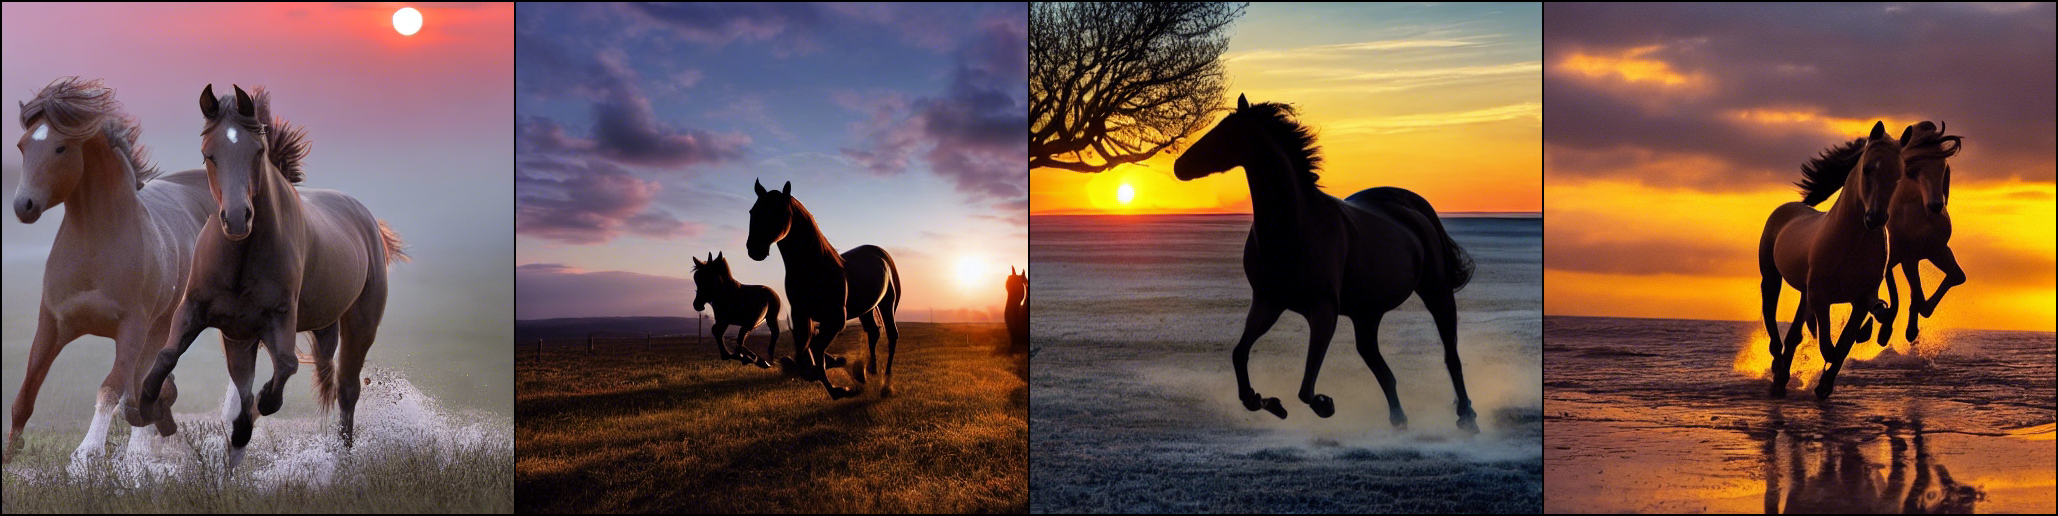

In [25]:
from PIL import Image
import os, glob
filename = max(glob.iglob('outputs/txt2img-samples/grid-*.png'), key=os.path.getmtime)
print(filename)
image = Image.open(filename)
image.show()